# Bag of Words

In [1]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
        bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
    else:
        index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
        bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index) 

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [2]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

In [3]:
# CountVectorizer를 이용하여 Bow를 쉽게 형성

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [4]:
# 띄워쓰기를 기준으로 하는 낮은 토큰화 방식
# 한국어에는 특히 어울리지 않는 방법

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다',
          '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다',
        '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_)

[[0 1 0 1 1 1 0 1 0 1 0 0 1 0]
 [1 0 1 0 0 0 1 0 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'정부가': 12, '발표하는': 7, '물가상승률과': 4, '소비자가': 9, '느끼는': 1, '물가상승률은': 5, '다르다': 3, '소비자는': 10, '주로': 13, '소비하는': 11, '상품을': 8, '기준으로': 0, '물가상승률을': 6, '느낀다': 2}


In [5]:
# 불용어 지정 시 제외하고 카운팅 

from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [6]:
text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [7]:
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# TF-IDF

In [8]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log

In [9]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [10]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [11]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [12]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [13]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# LSA

In [40]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

In [41]:
# SVD 분해
U, s, VT = np.linalg.svd(A, full_matrices = True)
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


(4, 4)

In [42]:
# 대각행렬확인
print(s.round(2))
np.shape(s)

[2.69 2.05 1.73 0.77]


(4,)

In [43]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [44]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

In [45]:
# 다시 곱했을 때 같은지 여부
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [46]:
# 상위 2 특이값만 추출
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


In [47]:
U=U[:,:2]
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


In [48]:
VT=VT[:2,:]
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [49]:
# 기존의 DTM과 비교했을 때 비슷한 결과를 보임
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [50]:
# 실제 예시를 통한 사례, 뉴스 데이터 분석
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [51]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [52]:
# 뉴스들이 갖고 있는 20가지 주제들
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [53]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [54]:
# 정제 작업 확인 
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [55]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [56]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [57]:
# tf-idf를 만들기 위해 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [58]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

(11314, 1000)

In [60]:
# n_components는 특이값 개수
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [61]:
# 각 20개의 주제의 각 1,000개의 열 중 가장 값이 큰 5개의 값을 찾아서 단어로 출력
# 새로운 문서가 유입되면 분해를 처음부터 해야하기 때문에 업데이트가 느리다는 단점
# 14번 주제는 sci.space, 3번 주제는 rec.sport, 18번 주제는 religion 등 주제를 어느 정도 반영 

terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21378), ('know', 0.20032), ('people', 0.19317), ('think', 0.17807), ('good', 0.15105)]
Topic 2: [('thanks', 0.3292), ('windows', 0.29094), ('card', 0.18016), ('drive', 0.1739), ('mail', 0.15126)]
Topic 3: [('game', 0.37161), ('team', 0.32553), ('year', 0.28204), ('games', 0.25416), ('season', 0.18464)]
Topic 4: [('drive', 0.52804), ('scsi', 0.20035), ('disk', 0.15514), ('hard', 0.15506), ('card', 0.14041)]
Topic 5: [('windows', 0.4052), ('file', 0.25609), ('window', 0.18057), ('files', 0.1619), ('program', 0.1401)]
Topic 6: [('chip', 0.16138), ('government', 0.16026), ('mail', 0.15625), ('space', 0.1505), ('information', 0.13575)]
Topic 7: [('like', 0.67109), ('bike', 0.14268), ('know', 0.11428), ('chip', 0.11058), ('sounds', 0.10398)]
Topic 8: [('card', 0.45115), ('sale', 0.21607), ('video', 0.21391), ('monitor', 0.14913), ('offer', 0.14872)]
Topic 9: [('know', 0.44979), ('card', 0.35491), ('chip', 0.17206), ('video', 0.15184), ('government', 0.15053)]
Topic 10: [

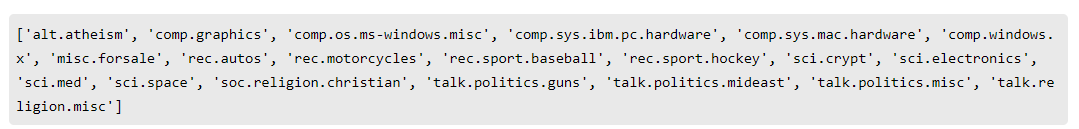

# LDA

In [62]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [63]:
# 단어의 인덱스와 해당 문서에서 단어의 등장 횟수
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [64]:
print(dictionary[66])

faith


In [65]:
len(dictionary)

64281

In [66]:
# 단어의 계수는 해당 토픽에 대한 단어의 기여도를 의미
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.040*"space" + 0.012*"nasa" + 0.009*"year" + 0.009*"entries"')
(1, '0.017*"mail" + 0.015*"information" + 0.014*"please" + 0.013*"send"')
(2, '0.023*"file" + 0.015*"program" + 0.013*"windows" + 0.010*"window"')
(3, '0.012*"would" + 0.010*"like" + 0.010*"know" + 0.008*"thanks"')
(4, '0.007*"dodgers" + 0.007*"decenso" + 0.006*"cubs" + 0.006*"idle"')
(5, '0.015*"health" + 0.015*"medical" + 0.011*"disease" + 0.009*"patients"')
(6, '0.020*"president" + 0.016*"government" + 0.010*"states" + 0.009*"american"')
(7, '0.018*"data" + 0.016*"image" + 0.008*"software" + 0.008*"images"')
(8, '0.013*"bike" + 0.010*"cars" + 0.010*"engine" + 0.008*"price"')
(9, '0.013*"armenian" + 0.011*"israel" + 0.011*"armenians" + 0.010*"jews"')
(10, '0.054*"drive" + 0.034*"disk" + 0.033*"scsi" + 0.022*"hard"')
(11, '0.016*"cover" + 0.011*"copies" + 0.009*"phillies" + 0.008*"radius"')
(12, '0.023*"church" + 0.013*"henrik" + 0.013*"militia" + 0.012*"right"')
(13, '0.025*"encryption" + 0.021*"chip" + 0.019*"keys"

In [67]:
# 디폴트 값으로 토픽별 10개의 단어들을 추출
print(ldamodel.print_topics())

[(0, '0.040*"space" + 0.012*"nasa" + 0.009*"year" + 0.009*"entries" + 0.009*"launch" + 0.008*"char" + 0.007*"earth" + 0.007*"contest" + 0.007*"satellite" + 0.006*"shuttle"'), (1, '0.017*"mail" + 0.015*"information" + 0.014*"please" + 0.013*"send" + 0.011*"email" + 0.011*"list" + 0.008*"address" + 0.008*"available" + 0.007*"internet" + 0.007*"also"'), (2, '0.023*"file" + 0.015*"program" + 0.013*"windows" + 0.010*"window" + 0.010*"files" + 0.010*"output" + 0.009*"entry" + 0.008*"version" + 0.007*"using" + 0.007*"server"'), (3, '0.012*"would" + 0.010*"like" + 0.010*"know" + 0.008*"thanks" + 0.008*"anyone" + 0.007*"need" + 0.007*"problem" + 0.007*"work" + 0.007*"system" + 0.007*"also"'), (4, '0.007*"dodgers" + 0.007*"decenso" + 0.006*"cubs" + 0.006*"idle" + 0.005*"giants" + 0.005*"darren" + 0.005*"mario" + 0.005*"main" + 0.005*"gift" + 0.005*"crashes"'), (5, '0.015*"health" + 0.015*"medical" + 0.011*"disease" + 0.009*"patients" + 0.006*"page" + 0.006*"cancer" + 0.006*"diseases" + 0.006*"me

In [68]:
# 문서별 토픽의 비중
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(4, 0.15122713), (6, 0.023365753), (9, 0.37898627), (17, 0.026436191), (19, 0.4076749)]
1 번째 문서의 topic 비율은 [(12, 0.114032485), (14, 0.053886402), (16, 0.116750315), (19, 0.6942644)]
2 번째 문서의 topic 비율은 [(0, 0.0728039), (9, 0.3562452), (12, 0.016716944), (19, 0.5413076)]
3 번째 문서의 topic 비율은 [(6, 0.09057696), (10, 0.08061455), (13, 0.26794738), (16, 0.05271231), (18, 0.11237008), (19, 0.38481867)]
4 번째 문서의 topic 비율은 [(15, 0.403233), (19, 0.5634093)]


In [69]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [70]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,19.0,0.4077,"[(4, 0.151227), (6, 0.023365209), (9, 0.378997..."
1,1,19.0,0.6943,"[(12, 0.1140328), (14, 0.053886406), (16, 0.11..."
2,2,19.0,0.5413,"[(0, 0.07280155), (9, 0.35624182), (12, 0.0167..."
3,3,19.0,0.3848,"[(6, 0.090577595), (10, 0.08061661), (13, 0.26..."
4,4,19.0,0.5634,"[(15, 0.40321198), (19, 0.56343037)]"
5,5,19.0,0.4792,"[(0, 0.18225594), (11, 0.06624235), (16, 0.237..."
6,6,3.0,0.5870,"[(2, 0.0413213), (3, 0.58702826), (5, 0.017804..."
7,7,19.0,0.5833,"[(3, 0.17730999), (4, 0.034164593), (9, 0.1435..."
8,8,19.0,0.3771,"[(2, 0.2224445), (9, 0.26553372), (11, 0.03629..."
9,9,3.0,0.4273,"[(3, 0.42732573), (8, 0.15202497), (16, 0.1309..."


# Word2Vec

In [16]:
import re
from lxml import etree
import urllib.request
import zipfile
from nltk.tokenize import word_tokenize, sent_tokenize

In [17]:
urllib.request.urlretrieve("https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip", filename="ted_en-20160408.zip")
# 데이터 다운로드

with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
  target_text = etree.parse(z.open('ted_en-20160408.xml', 'r'))
  parse_text = '\n'.join(target_text.xpath('//content/text()'))
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.

In [18]:
parse_text[:300]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit"

In [19]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.

sent_text=sent_tokenize(content_text)
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.

result = [word_tokenize(sentence) for sentence in normalized_text]
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.

In [20]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [21]:
for line in result[:3]: # 샘플 3개만 출력
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [26]:
# pip install gensim
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [27]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8691797852516174), ('guy', 0.7960305213928223), ('lady', 0.7846928834915161), ('boy', 0.7706820964813232), ('girl', 0.7662710547447205), ('gentleman', 0.7291470766067505), ('kid', 0.7156811952590942), ('soldier', 0.7098273038864136), ('writer', 0.672561764717102), ('rabbi', 0.6657862067222595)]


In [28]:
# 한국어 워드투벡
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [29]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [30]:
print(len(train_data)) # 리뷰 개수 출력
print(train_data.isnull().values.any())

200000
True


In [31]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

False
199992


In [32]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [33]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [34]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


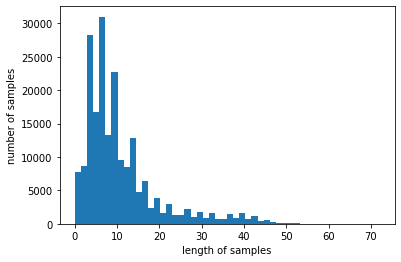

In [35]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [37]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [38]:
print(model.wv.most_similar("최민식"))

[('설경구', 0.870771050453186), ('공효진', 0.8618296384811401), ('최민수', 0.8569884300231934), ('한석규', 0.8557893633842468), ('이민호', 0.8502103090286255), ('채민서', 0.8406965732574463), ('류덕환', 0.8406258821487427), ('정재영', 0.8366889953613281), ('송강호', 0.8340768814086914), ('이정재', 0.8333344459533691)]


In [39]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8786855340003967), ('무협', 0.8760503530502319), ('호러', 0.8496416807174683), ('느와르', 0.8447622060775757), ('무비', 0.8412858247756958), ('정통', 0.8362785577774048), ('물의', 0.8227288722991943), ('블랙', 0.8095834851264954), ('멜로', 0.8089835047721863), ('물', 0.8056188821792603)]


# Skip-Gram with Negative Sampling

In [111]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [112]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [113]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [114]:
news_df.isnull().values.any()

False

In [115]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 11314


In [116]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [117]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


In [118]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [119]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


In [120]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]


In [121]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
# 윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우는 0의 레이블
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(atrocities (4406), existance (4865)) -> 1
(commited (7837), daily (1920)) -> 1
(ignore (1979), subsidizing (15228)) -> 1
(soldiers (957), aohonj (55777)) -> 0
(sure (59), rediculous (15227)) -> 1


In [122]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [123]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [124]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [125]:
embed_size = 100

In [126]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [127]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [128]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 100)       6427700     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 100)       6427700     input_4[0][0]                    
____________________________________________________________________________________________

In [129]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 6.931243658065796
Epoch : 2 Loss : 6.906789422035217
Epoch : 3 Loss : 6.881309747695923
Epoch : 4 Loss : 6.850980281829834
Epoch : 5 Loss : 6.813310325145721


In [130]:
import gensim

In [131]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [132]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [133]:
w2v.most_similar(positive=['soldiers'])

[('ugvug', 0.4456321597099304),
 ('periphery', 0.43874552845954895),
 ('vjpwuo', 0.42627042531967163),
 ('exiled', 0.4121643602848053),
 ('rainouts', 0.38186800479888916),
 ('andrus', 0.38043490052223206),
 ('veins', 0.3791557550430298),
 ('gliding', 0.3790082335472107),
 ('borealous', 0.37637829780578613),
 ('mypeu', 0.37071192264556885)]

In [134]:
w2v.most_similar(positive=['doctor'])

[('predicatbaly', 0.40517616271972656),
 ('azjjp', 0.38339585065841675),
 ('someonepost', 0.37462979555130005),
 ('integers', 0.3693121075630188),
 ('mcilvaine', 0.35764047503471375),
 ('kirnkh', 0.3530123233795166),
 ('adherents', 0.3482312560081482),
 ('unscathed', 0.3480411171913147),
 ('compounded', 0.3469890356063843),
 ('kalpa', 0.3459509313106537)]

In [135]:
w2v.most_similar(positive=['police'])

[('opportunity', 0.39234161376953125),
 ('mclean', 0.3864136040210724),
 ('others', 0.3811820447444916),
 ('vagarshakovich', 0.3790912628173828),
 ('katzke', 0.3775111138820648),
 ('cowgirls', 0.37122857570648193),
 ('medics', 0.3593009114265442),
 ('xtpeekevent', 0.35763442516326904),
 ('tmhx', 0.3555253744125366),
 ('organized', 0.35362446308135986)]

In [ ]:
pip install glove_python

In [ ]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

In [ ]:
model_result1=glove.most_similar("man")
print(model_result1)

In [ ]:
model_result2=glove.most_similar("boy")
print(model_result2)

In [ ]:
model_result6=glove.most_similar("muscle")
print(model_result6)